100%|██████████| 10000/10000 [01:43<00:00, 96.65it/s]


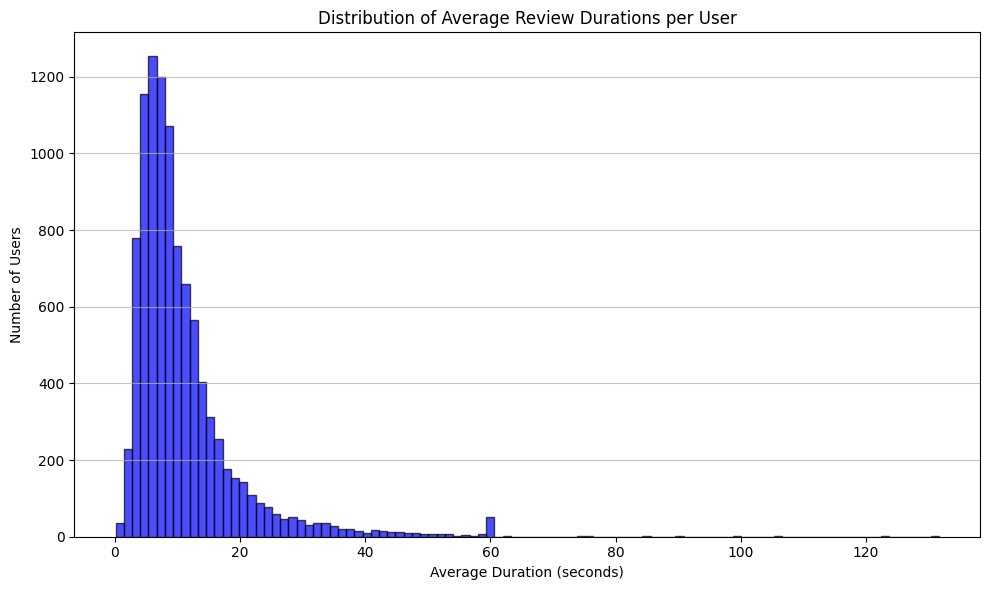

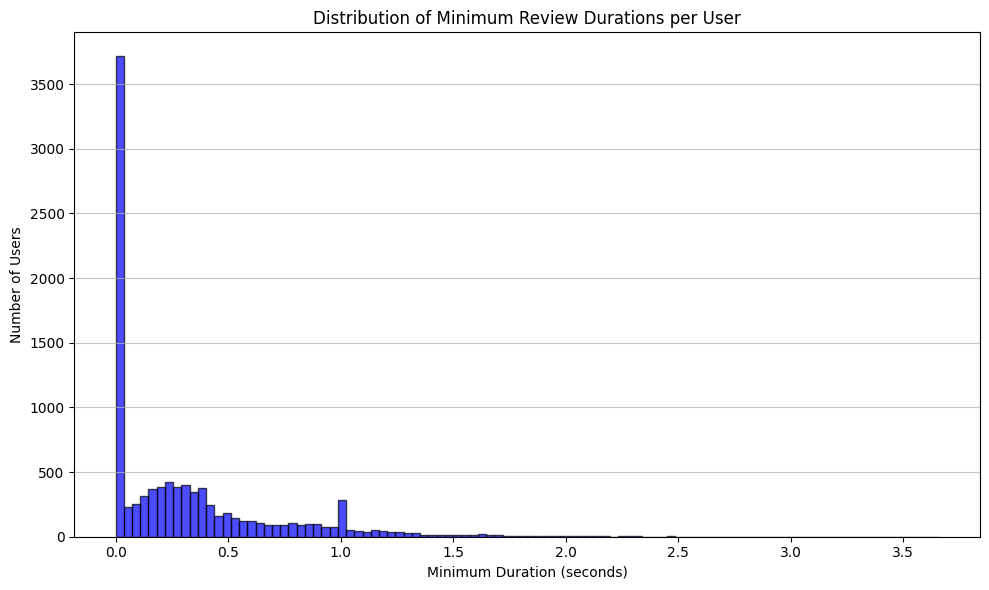

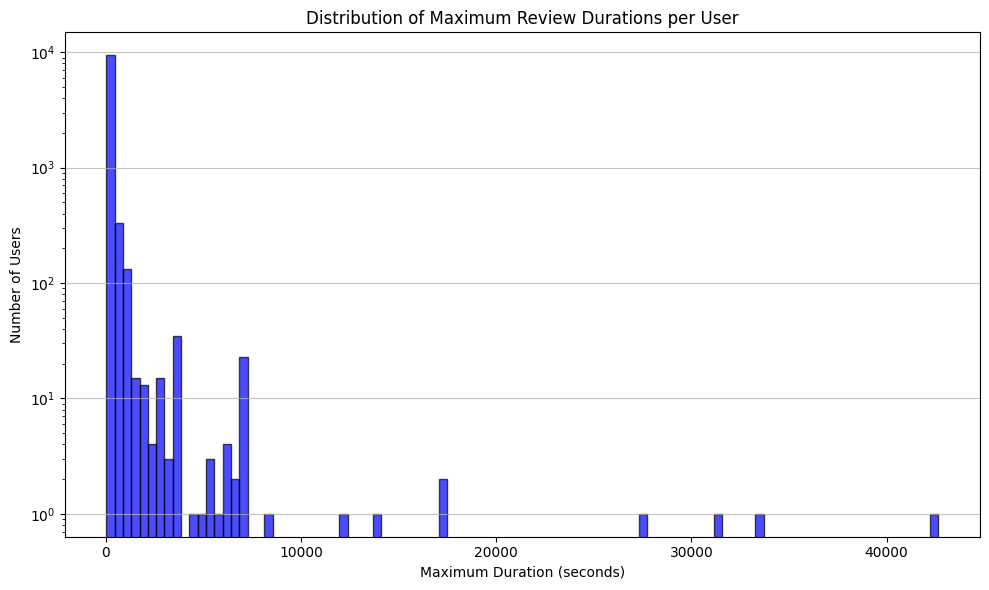

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path
import numpy as np

dataset_path = '../../anki-revlogs-10k/revlogs/'

# Collect data
avg_durations = []
min_max_durations = []
i = 0
for file in tqdm(list(Path(dataset_path).iterdir()), smoothing=0):
    i += 1
    user_id = str(i)
    dataset = pd.read_parquet(dataset_path + "//user_id=" + user_id)
    durations = np.array(dataset['duration'].dropna().values)

    avg_duration = np.median(durations)/1000
    avg_durations.append(avg_duration)

    min_max_duration = [np.min(durations)/1000, np.max(durations)/1000]
    min_max_durations.append(min_max_duration)

avg_durations = np.array(avg_durations)
min_max_durations = np.array(min_max_durations)

# Plot for the average durations
plt.figure(figsize=(10, 6))
plt.hist(avg_durations, bins=100, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of Average Review Durations per User')
plt.xlabel('Average Duration (seconds)')
plt.ylabel('Number of Users')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

# Plots for the maximum and minimum durations
min_max_durations = np.array(min_max_durations)
min_durations = min_max_durations[:, 0]
max_durations = min_max_durations[:, -1]

plt.figure(figsize=(10, 6))
plt.hist(min_durations, bins=100, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of Minimum Review Durations per User')
plt.xlabel('Minimum Duration (seconds)')
plt.ylabel('Number of Users')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(max_durations, bins=100, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of Maximum Review Durations per User')
plt.xlabel('Maximum Duration (seconds)')
plt.ylabel('Number of Users')
plt.yscale('log')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()